# Econometric analysis of the impact of monetary policy on inflation in Poland in the years 2004-2024

### Replication of a VAR model from a Master's thesis: stationarity tests, autocorrelation, lag selection (AIC), impulse response functions, interpretation

### 1. Data

This analysis uses monthly time series data from 2004-2024,
i.e. 252 observations. The econometric analysis was designed to answer the question of whether
monetary policy influenced inflation in the years analyzed. Monetary policy
in this chapter was understood as the main instrument of the National Bank of Poland, i.e., interest rates. 
Specifically, the data
used the *reference rate*. 

The paper presents the monetary transmission channels in detail,
but the entire mechanism can be simplified to the interest rate channel, the exchange rate
channel, and the expectations channel. The data set includes a variable with the *EUR/PLN exchange rate*, which
is intended to reflect the exchange rate channel. The variable for inflation is the *CPI* in relation
to the same month a year earlier. 

The dummy variable was included to account for the COVID-19 pandemic, taking a value of 1 from March 2020 to November 2021 to capture the period of unprecedented monetary policy. During this time, interest rates were lowered despite rising inflation, which contradicts standard economic theory. This approach helps the model to effectively estimate the relationships between variables during periods without major external shocks, as also suggested in reports by the European Central Bank.

All variables are presented in
the charts and are discussed in the 3 chapter in the Master's thesis.

In [77]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [78]:
#importing data
df = pd.read_csv("/Users/kacpercieslak/desktop/PROJEKTY/Praca_MGR_VAR/Dane_M.csv",sep=';')
df = df.iloc[:,[0,2,4,5,6]]
df

,data2,EUR_PLN,stopa_referencyjna,dummy,CPI
0,01/01/2004,"4,7989","5,25",0,"1,6"
1,01/02/2004,"4,8888","5,25",0,"1,6"
2,01/03/2004,"4,7533","5,25",0,"1,7"
3,01/04/2004,"4,8104","5,25",0,"2,2"
4,01/05/2004,"4,6478","5,25",0,"3,4"
...,...,...,...,...,...
247,01/08/2024,"4,28204","5,75",0,"4,3"
248,01/09/2024,"4,28204","5,75",0,"4,9"
249,01/10/2024,"4,35242","5,75",0,5
250,01/11/2024,"4,29515","5,75",0,"4,7"


In [79]:
#changing data types
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')
    
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col])
df.dtypes

data2                  object
EUR_PLN               float64
stopa_referencyjna    float64
dummy                   int64
CPI                   float64
dtype: object

In [80]:
df_var.describe()

,EUR_PLN,stopa_referencyjna,dummy,CPI
count,252.000000,252.000000,252.000000,252.000000
mean,4.221459,3.455159,0.075397,3.366270
std,0.296878,1.943821,0.264556,3.751336
min,3.211200,0.100000,0.000000,-1.600000
25%,4.074343,1.500000,0.000000,1.375000
50%,4.247635,3.500000,0.000000,2.600000
75%,4.390612,5.000000,0.000000,4.200000
max,4.888800,6.750000,1.000000,18.400000


EUR_PLN has a mean of approximately 4.22, with a standard deviation of 0.30, indicating moderate volatility. The rate fluctuated between a minimum of 3.21 and a maximum of 4.89.

Stopa_referencyjna (reference rate) shows significant variation, with a standard deviation of 1.94 and a wide range from 0.10% to 6.75%. The mean reference rate over the period was around 3.46%.

The dummy variable has a mean of 0.075, indicating that the event it represents occurred in about 7.5% of the observations. Its range is from 0 to 1, as expected for a binary variable.

CPI (inflation) has a mean of 3.37% and a high standard deviation of 3.75%, suggesting substantial volatility. Inflation experienced a wide range, from a minimum of -1.6% (deflation) to a peak of 18.4%.

### 2. Verification of econometric model assumptions

In this study, a Vector Autoregression (VAR) model was used. It is the most popular and often initial model for time-series analysis. The VAR model does not impose a priori relationships between variables; therefore, any conclusions about causality must be confirmed by the theory of the monetary transmission mechanism.

The model used in the study included three endogenous variables in the following order: CPI inflation, the reference rate, and the euro exchange rate, along with one exogenous variable: COVID. The model will not only allow for an assessment of whether the interest rate and exchange rate influenced inflation but also whether the reference rate had an impact on the euro exchange rate.

#### 2.1 ADF test

In [89]:
from statsmodels.tsa.stattools import adfuller

# ADF test
for col in ["EUR_PLN", "stopa_referencyjna", "CPI"]:
    result = adfuller(df[col])
    print(f"ADF test for {col}:")
    print(f"  Statistics: {result[0]}")
    print(f"  p-value: {result[1]}")
    print(f"  Critical values: {result[4]}")
    print("---")

ADF test for EUR_PLN:
  Statistics: -3.2932548711522913
  p-value: 0.01518268740366172
  Critical values: {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544}
---
ADF test for stopa_referencyjna:
  Statistics: -2.7358137250434122
  p-value: 0.06804330184428797
  Critical values: {'1%': -3.4573260719088132, '5%': -2.873410402808354, '10%': -2.573095980841316}
---
ADF test for CPI:
  Statistics: -1.5648099910110176
  p-value: 0.5012424299515406
  Critical values: {'1%': -3.458010773719797, '5%': -2.8737103617125186, '10%': -2.5732559963936206}
---


EUR_PLN

Stationarity: The p-value (0.0152) is less than the 10% significance level (0.10). Therefore, we reject the null hypothesis that a unit root is present. This indicates that the EUR_PLN series is stationary at the 10% significance level.

stopa_referencyjna

Stationarity: The p-value (0.0680) is less than the 10% significance level (0.10). Therefore, we reject the null hypothesis of a unit root. This indicates that the stopa_referencyjna (reference rate) series is stationary at the 10% significance level.

CPI

Stationarity: The p-value (0.5012) is greater than the 10% significance level (0.10). Therefore, we do not reject the null hypothesis of a unit root. This indicates that the CPI series is non-stationary at the 10% significance level.

#### 2.2 Johansen test

In [82]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

data = df[["CPI", "stopa_referencyjna", "EUR_PLN"]]

#Johansen test
result = coint_johansen(data, det_order=0, k_ar_diff=2)

print("\n=== Trace Test ===")
print("H0: Number of cointegrating vectors = r vs. H1: r > 0")
print("Test statistics:", result.lr1) # r=0, r=1, r=2
print("Critical values (90%, 95%, 99%):\n", result.cvt) # for 0 (...,...,...); for 1 (...,...,...); for 2(...)
print("---")

print("\n=== Maximum Eigenvalue Test (Lmax) ===")
print("H0: Number of cointegrating vectors = r vs. H1: r = r+1")
print("Test statistics:", result.lr2)
print("Critical values (90%, 95%, 99%):\n", result.cvm)
print("---")

# np. dla alfa=10%, 43.36>27.06 --> odrzucamy H0, 20.46>13.43 --> odrzucamy H0, 7.11>2.7 --> odrzucamy H0


=== Trace Test ===
H0: Number of cointegrating vectors = r vs. H1: r > 0
Test statistics: [43.36016859 20.46082463  7.11821801]
Critical values (90%, 95%, 99%):
 [[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
---

=== Maximum Eigenvalue Test (Lmax) ===
H0: Number of cointegrating vectors = r vs. H1: r = r+1
Test statistics: [22.89934395 13.34260662  7.11821801]
Critical values (90%, 95%, 99%):
 [[18.8928 21.1314 25.865 ]
 [12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]
---


Based on the results of the Johansen cointegration test at the 10% significance level, we can conclude that there is a full rank of cointegrating vectors. This means the variables in your model are stationary and can be used in a VAR model without differencing.

#### 2.3 AIC

In [83]:
best_aic = np.inf
best_lag = None

for p in range(1, 7):
    model = VAR(endog=endog_data, exog=exog_data)
    results = model.fit(p)
    
    aic_value = results.aic
    print(f"Number of lags (p={p}): AIC = {aic_value:.4f}")
    
    if aic_value < best_aic:
        best_aic = aic_value
        best_lag = p

print(f"\nThe model with the lowest AIC is the one with {best_lag} lags.")

Number of lags (p=1): AIC = -9.4782
Number of lags (p=2): AIC = -10.0126
Number of lags (p=3): AIC = -9.9844
Number of lags (p=4): AIC = -9.9848
Number of lags (p=5): AIC = -9.9878
Number of lags (p=6): AIC = -9.9441

The model with the lowest AIC is the one with 2 lags.


#### 2.4 Model VAR

In [84]:
# endo data
endog_data = df.iloc[:,[4,2,1]]

# exog data
exog_data = df.iloc[:,[3]]

model = VAR(endog=endog_data, exog=exog_data)
results = model.fit(best_lag)
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 06, Aug, 2025
Time:                     10:11:55
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -9.67451
Nobs:                     250.000    HQIC:                  -9.87651
Log likelihood:           211.368    FPE:                4.48357e-05
AIC:                     -10.0126    Det(Omega_mle):     4.07929e-05
--------------------------------------------------------------------
Results for equation CPI
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                        -0.869418         0.627309           -1.386           0.166
dummy                        -0.018673         0.154095           -0.121           0.904
L1.CPI                        

Based on the VAR model results with a significance level (α) of 10% (p-value < 0.10):

For the CPI equation: The lagged values of both the reference rate (stopa_referencyjna) and the EUR/PLN exchange rate are statistically significant in influencing CPI.

For the reference rate equation (stopa_referencyjna): The lagged values of CPI and the EUR/PLN exchange rate are statistically significant.

For the EUR/PLN equation: The lagged values of the reference rate are statistically significant, but the lagged values of CPI are not statistically significant.

#### 2.5 Portmanteau test

In [85]:
test_results = results.test_whiteness(nlags=24)

statystyka = test_results.test_statistic
dof = test_results.df
p_value = test_results.pvalue

# results
print(f"Statystyka testowa: {statystyka}")
print(f"Stopnie swobody: {dof}")
print(f"Wartość p: {p_value}")

Statystyka testowa: 215.27602236946794
Stopnie swobody: 198
Wartość p: 0.19013805887886187


The p-value of 0.1901 is greater than the standard significance level of 0.05. Therefore, we do not reject the null hypothesis.

This means that there is no statistically significant evidence of autocorrelation in the residuals of the model

### 3. Impuls reactions funtions

#### 3.1 Impact of a 1% Increase in the Reference Rate on CPI

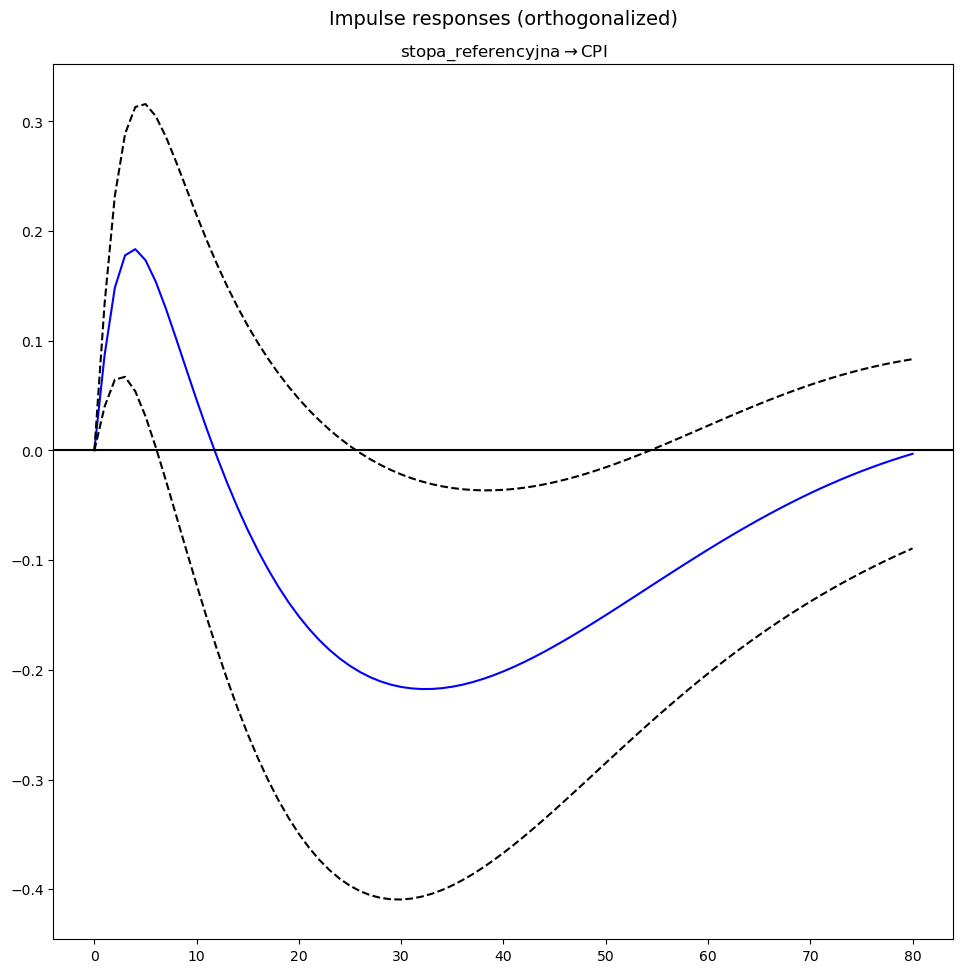

In [86]:
results.irf(80).plot(orth=True, impulse='stopa_referencyjna', response='CPI', signif=0.10);

The initial reaction of inflation is inconsistent with theoretical assumptions, as it rises
and is significant in the first 5 months. The significance in a given period is determined by the confidence interval,
which must have values greater than or less than zero. 

Inflation 
CPI only begins to fall in response to an increase in the reference rate after about
10 months. However, this negative relationship is only significant from the 25th month onwards. The maximum
impact on inflation only appears between the 25th and 30th month. The unexpected increase in
inflation after an interest rate shock is known in the literature as the “price puzzle.” 
This may be caused by an increase in inflation expectations
that are not included in the model. The VAR model presented is a highly
simplified monetary policy transmission mechanism, so it is possible that other important variables that actually cause this further increase in prices are missing.

However, according to
theory, inflation should react significantly to a more restrictive monetary policy
with a delay, and this negative relationship has been successfully demonstrated in the model. The impulse only
expires after about 80 months, which is a relatively long period.

#### 3.2 Impact of a 1% Increase in the EUR/PLN on CPI

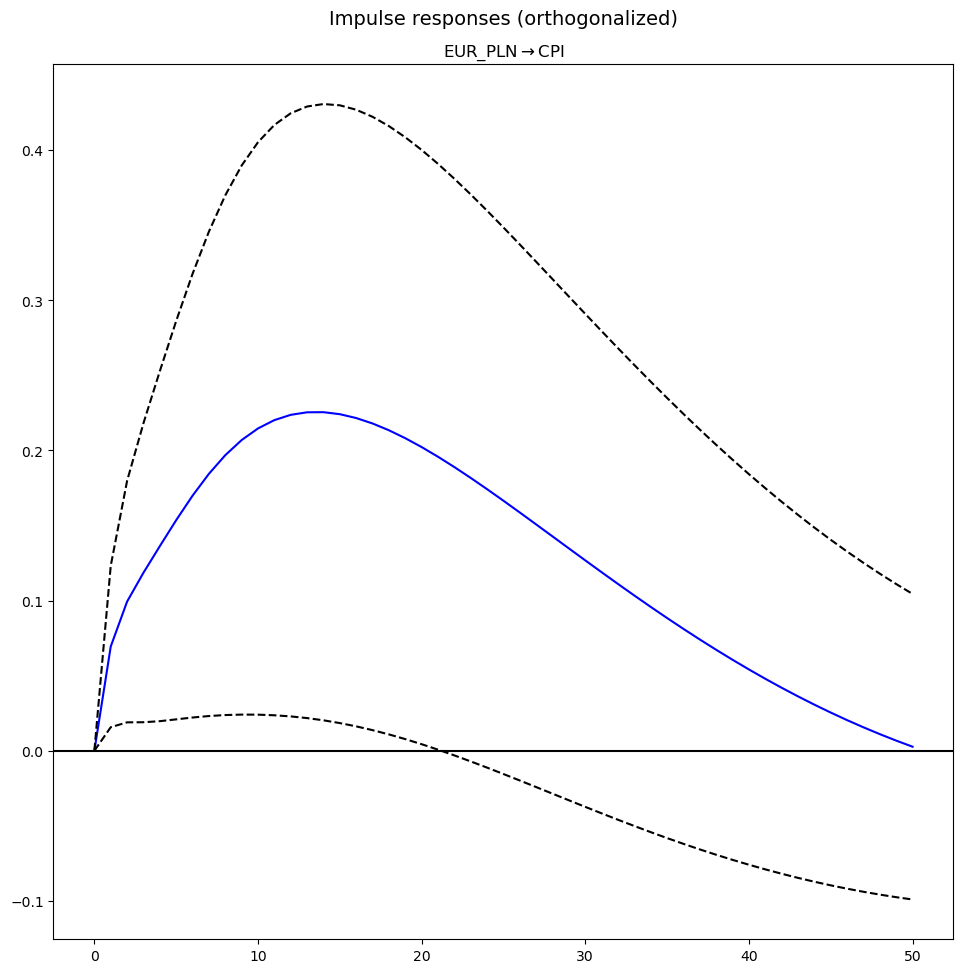

In [87]:
results.irf(50).plot(orth=True, impulse='EUR_PLN', response='CPI', signif=0.10);

This time, the impulse is completely consistent with theory. The rise in the euro exchange rate, i.e., the weakening of the
PLN, has caused CPI inflation to rise from one month onwards. The impulse is significant for the first year.
Its maximum impact is observed after about 13 months. The impulse stabilizes after
about 50 months. A weaker exchange rate causes an increase in import prices, which ultimately translates
into domestic prices.

#### 3.3 Impact of a 1% Increase in the  Reference Rate on EUR/PLN

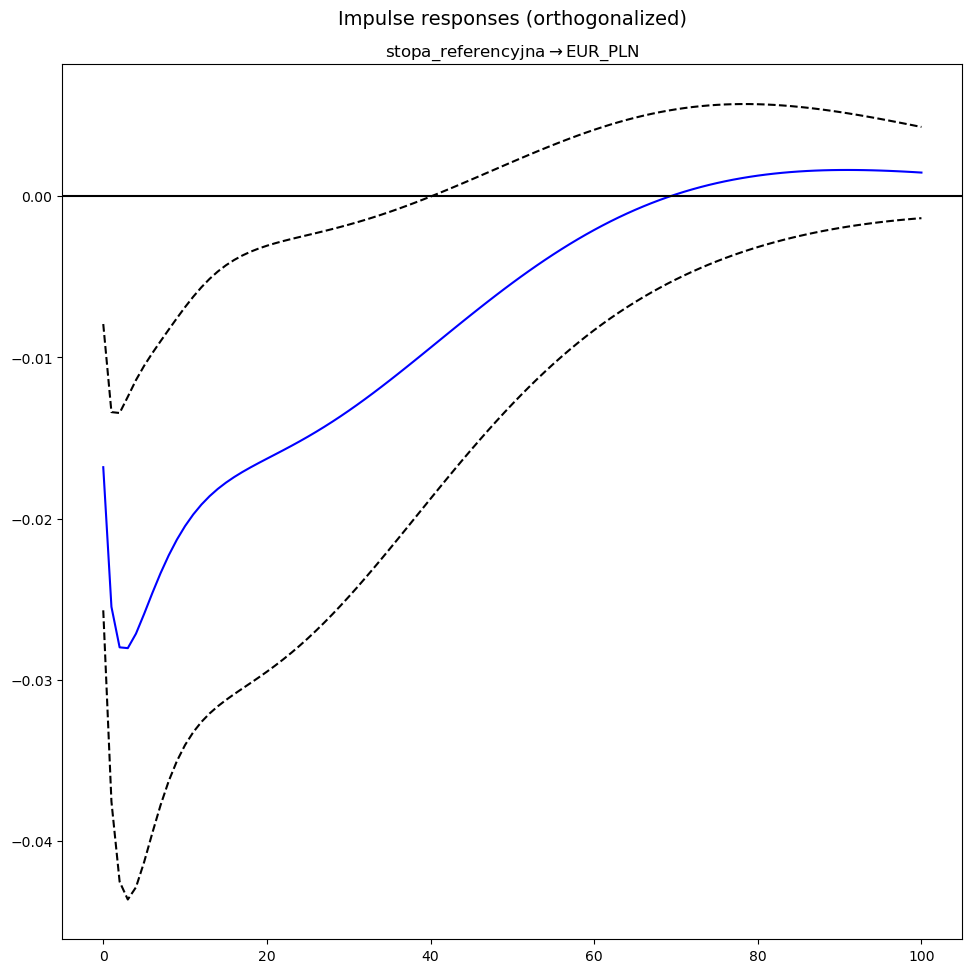

In [88]:
results.irf(100).plot(orth=True, impulse='stopa_referencyjna', response='EUR_PLN', signif=0.10);

The impulse is again consistent with theoretical assumptions. An increase in the reference rate
has an immediate effect on the EUR/PLN exchange rate. The maximum impact occurs
after about two months, and the decline in the exchange rate is significant for the first 35 months. The impulse again
fades late, only after about 60 months.

### 4. Summary

The presented relationships confirmed the hypothesis that monetary policy in the form of the reference rate
has a significant impact on inflation in Poland in the years 2004-2024. It was indicated that in the model
there was an initial increase in inflation after a monetary policy shock, which is characteristic of simple models
. 

In addition, it was shown that the EUR/PLN exchange rate has a significant impact on
inflation. A negative relationship between interest rate increases and
exchange rate declines was also confirmed.